# Digit Recognition with Convolutional Neural Networks

The [MNIST dataset](http://yann.lecun.com/exdb/mnist/), officially known as "The MNIST Database of Handwritten Digits," is a famous dataset used to train machine-learning models (and neural networks) to recognize handwritten digits. Each digit in the dataset consists of a 28x28 array of numbers representing pixel values from 0 to 255. In this example, we will use Keras to build and train a convolutional neural network (CNN) on the MNIST dataset. The dataset is included in Keras as a sample dataset, so we'll begin by loading it and examining its content and structure.

![](Images/mnist.png)

In [1]:
from keras.datasets import mnist

(train_images, y_train), (test_images, y_test) = mnist.load_data()
print(f'train_images: {train_images.shape}')
print(f'y_train: {y_train.shape}')
print(f'test_images: {test_images.shape}')
print(f'y_test: {y_test.shape}')

train_images: (60000, 28, 28)
y_train: (60000,)
test_images: (10000, 28, 28)
y_test: (10000,)


Plot the first 50 images and show the corresponding labels.

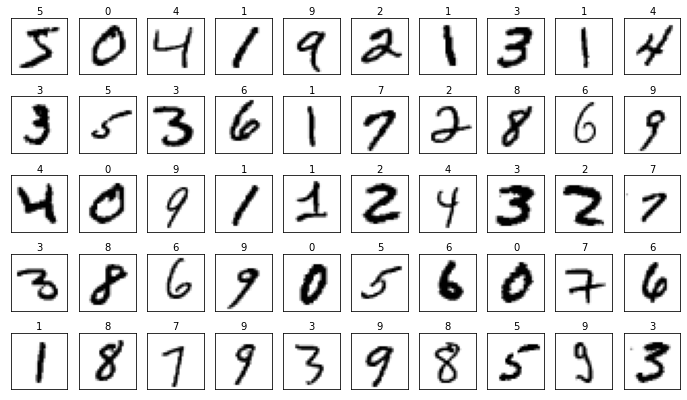

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(y_train[i]), transform=ax.transAxes)

Reshape the image data for input to a CNN and normalize the pixel values by dividing them by 255.

In [3]:
x_train = train_images.reshape(60000, 28, 28, 1) / 255
x_test = test_images.reshape(10000, 28, 28, 1) / 255

Create a convolutional neural network with a `softmax` output layer for classification.

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary(line_length=80)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d (Conv2D)                    (None, 26, 26, 32)              320         
                                                                                
 max_pooling2d (MaxPooling2D)       (None, 13, 13, 32)              0           
                                                                                
 conv2d_1 (Conv2D)                  (None, 11, 11, 64)              18496       
                                                                                
 max_pooling2d_1 (MaxPooling2D)     (None, 5, 5, 64)                0           
                                                                                
 flatten (Flatten)                  (None, 1600)                    0           
                                                                                
 dense (

Call `fit` to train the model.

In [5]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=50)

Epoch 1/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.1485 - accuracy: 0.9552 - val_loss: 0.0469 - val_accuracy: 0.9846
Epoch 2/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0431 - accuracy: 0.9867 - val_loss: 0.0363 - val_accuracy: 0.9865
Epoch 3/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0300 - accuracy: 0.9907 - val_loss: 0.0291 - val_accuracy: 0.9908
Epoch 4/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.0287 - val_accuracy: 0.9907
Epoch 5/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.0311 - val_accuracy: 0.9900
Epoch 6/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0135 - accuracy: 0.9959 - val_loss: 0.0300 - val_accuracy: 0.9911
Epoch 7/10
1200/1200 [==============================] - 11s 10ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.0307 - val_a

Plot the training and validation accuracy.

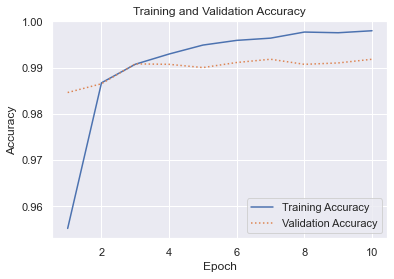

In [6]:
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

How accurate is the model?

In [7]:
scores = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {scores[1]:.1%}')

Accuracy: 99.2%


Show one of the test images.

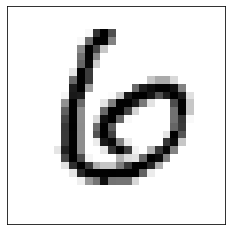

In [8]:
sns.reset_orig()
test_image = test_images[11]
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(test_image, cmap=plt.cm.gray_r)

Use the test image to make a prediction.

In [9]:
x = test_image.reshape(1, 28, 28, 1) / 255
model.predict(x)

array([[4.44765015e-12, 1.02402726e-14, 1.08661602e-16, 2.31535143e-15,
        1.39398855e-14, 7.70569719e-11, 1.00000000e+00, 1.10449097e-22,
        3.11213447e-12, 9.94747048e-21]], dtype=float32)

Get the predicted class.

In [10]:
import numpy as np

predicted_class = np.argmax(model.predict(x), axis=1)[0]
print('Looks like a ' + str(predicted_class) + '!')

Looks like a 6!
